# TP 5 : Modules mathématiques et Networkx en particulier

Voici quelques éléments de correction.

In [48]:
import networkx as nx  # on change le nom au passage, pour ne pas avoir à taper networkx à chaque fois

Commençons par une petite fonction qui crée le graphe $G$ à partir de la liste `L`.

In [17]:
def graphe_modulo(L,p):
    G= nx.Graph()
    G.add_nodes_from(L)
    N= len(L)
    for i in range(N):
        for j in range(i+1,N):
            x= L[i]
            y= L[j]
            if (x-y)%p == 0:
                G.add_edge(x,y)
    return G

>**Exercice (graphes modulo $p$)**. 
(1) On peut récupérer les arêtes d'un graphe $G$ à l'aide de `G.edges()`; on peut ajouter plusieurs arêtes d'un seul coup à un graphe à l'aide de `G.add_edges_from(liste)`. A l'aide de ces deux méthodes, écrire une fonction `ajoute(G,H)` qui ajoute au graphe $G$ les arêtes du graphe $H$ (ici on suppose que $G$ et $H$ ont les mêmes sommets). Cette fonction modifie $G$, mais ne renvoie rien (pas de `return`). Faire des essais.
>
>(2) Pour `L= [i for i in range(N)]`, avec $N$ de votre choix, et pour différentes valeurs de $p$ et $q$, déterminer le nombre de composantes connexes du graphe $G$ construit par
>
>`G= graphe_modulo(L,p)`
>
>`ajoute(G, graphe_modulo(L,q))`
>
>Emettre une hypothèse. Puis, la démontrer.





In [18]:
def ajoute(graphe1, graphe2):
    graphe1.add_edges_from( graphe2.edges() )

In [25]:
L= [i for i in range(300)]

In [30]:
p= 6
q= 30
G= graphe_modulo(L, p)
ajoute(G, graphe_modulo(L, q) )
print( len(list(nx.connected_components(G) )))

6


Réponse= $pgcd(p,q)$ ?

***Retour sur le puzzle.***

In [49]:
from itertools import product

prenoms= ["Mary", "Marion", "Margie", "Hilary", "Martha"]
noms= ["Brown", "Grey", "Black", "White", "Green"]
races= ["terrier", "caniche", "dalmatien", "setter", "basset"]
chiens= ["Loopsie", "Mooksie", "Smooksie", "Poopsie", "Woopsie"]

comb= [ [p, n, r, c] for p,n,r,c in product(prenoms, noms, races, chiens)]

In [50]:
implique=  lambda A, B : B or not A
equivalent=lambda A, B : A == B

In [51]:
filtre= [ [p,n,r,c] for p,n,r,c in comb if all([
    implique(n=="Brown", c in ["Loopsie", "Mooksie"]),
    implique(n=="Brown", r!= "terrier"),
    equivalent(c == "Woopsie", r == "caniche"),
    implique(c=="Woopsie", p != "Mary"),
    equivalent(r=="setter", p=="Marion"),
    implique(p=="Marion", c!="Loopsie"),
    equivalent(r=="basset", p=="Margie"),
    implique(r=="basset", c in ["Smooksie", "Mooksie"]),
    implique(n=="Grey", not(p=="Hilary")),
    implique(p=="Hilary", c in ["Poopsie", "Smooksie"]),
    equivalent(p=="Martha", n=="Black"),
    implique(p=="Martha", not(r=="dalmatien")),
    implique(n=="Grey", not(c=="Poopsie")),
    equivalent(c=="Mooksie", n=="White"),
    implique(n=="White", not(p=="Marion")) ]) # fin du all([...])
    ] # fin du [ de départ

In [52]:
len(filtre)

27

In [53]:
G= nx.Graph()
G.add_nodes_from(range(27))

In [54]:
def compatible(i,j):
    L= filtre[i]
    LL= filtre[j]
    if L[0]==LL[0] or L[1]==LL[1] or L[2]==LL[2] or L[3]==LL[3]:
        return False
    else:
        return True

In [55]:
def compatible2(i,j):  # autre solution
    return all([ filtre[i][k] != filtre[j][k] for k in range(4) ])

In [56]:
for i in range(27):
    for j in range(i+1, 27):
        if compatible(i,j):
            G.add_edge(i,j)

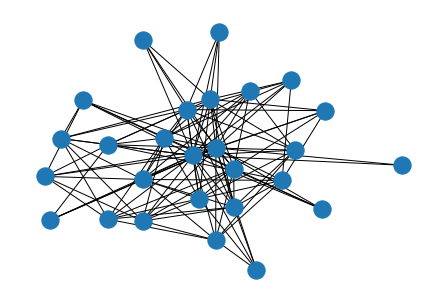

In [57]:
nx.draw(G)

In [59]:
for clique in nx.find_cliques(G):
    if len(clique) == 5:
        print(clique)

[26, 17, 13, 0, 20]


In [60]:
for i in [26, 17, 13, 0, 20]:
    print(filtre[i])

['Martha', 'Black', 'caniche', 'Woopsie']
['Margie', 'White', 'basset', 'Mooksie']
['Marion', 'Grey', 'setter', 'Smooksie']
['Mary', 'Brown', 'dalmatien', 'Loopsie']
['Hilary', 'Green', 'terrier', 'Poopsie']
